In [102]:
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
import astropy.units as u
from astropy.time import Time
import numpy as np

import matplotlib.pyplot as plt
from cartopy import crs

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
rigel = SkyCoord.from_name('Rigel')

In [5]:
orm = EarthLocation.of_site('Roque de los Muchachos')

In [117]:
t = Time('2017-02-17 18:00') + np.arange(0, 5 * 60, 1) * u.minute
t1 = Time('2017-02-17 20:05')
t2 = Time('2017-02-17 20:30')

rigel_altaz = rigel.transform_to(AltAz(location=orm, obstime=t))
altaz1 = rigel.transform_to(AltAz(location=orm, obstime=t1))
altaz2 = rigel.transform_to(AltAz(location=orm, obstime=t2))

print(t1, 'az={0.az.deg:.5f}, alt={0.az.deg:.5f}'.format(altaz1))
print(t2, 'az={0.az.deg:.5f}, alt={0.az.deg:.5f}'.format(altaz2))

2017-02-17 20:05:00.000 az=167.81700, alt=167.81700
2017-02-17 20:30:00.000 az=177.99943, alt=177.99943


/home/maxnoe/.local/anaconda3/lib/python3.5/site-packages/cartopy/mpl/geoaxes.py:586: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fadfe046048> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/maxnoe/.local/anaconda3/lib/python3.5/site-packages/cartopy/mpl/geoaxes.py:586: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fadfe0df200> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


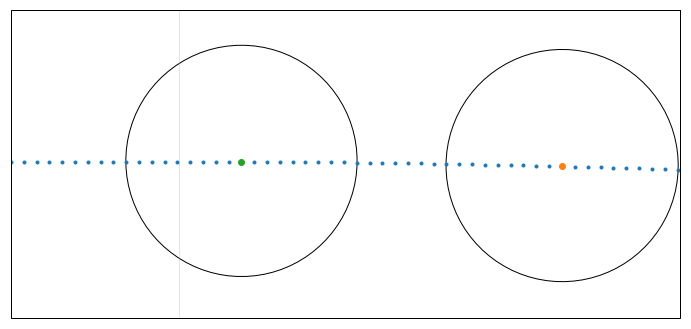

In [114]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs.NorthPolarStereo())

ax.plot(
    rigel_altaz.az.deg,
    rigel_altaz.alt.deg, 
    '.',
    transform=crs.PlateCarree(),

)

for alt in np.arange(90, -1, -15, dtype=float):
    ax.plot(
        np.linspace(0, 360, 150),
        np.full(150, alt),
        transform=crs.PlateCarree(),
        color='C1',
        linewidth=0.5,
        alpha=0.5,
    )
    
for az in np.arange(0, 360, 22.5, dtype=float):
    ax.plot(
        np.full(150, az),
        np.linspace(0, 90, 150),
        transform=crs.PlateCarree(),
        color='C1',
        linewidth=0.5,
        alpha=0.5,
    )

for altaz in (altaz1, altaz2):
    az = altaz.az.deg
    alt = altaz.alt.deg
    ax.plot(az, alt, 'o', transform=crs.PlateCarree())  
    ax.tissot(rad_km=250e3, lons=[az], lats=[alt], facecolor='none', color='k')

ax.set_extent([165, 185, 50, 55])